# Set up 

In [7]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result
from model.plotfbd import plotfbd
from model.PlotManager import PlotManager

In [8]:
#Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9) #m3
Iyy = 6610.17475482 * 10 ** (-6) #kgm2
hull_surface_area = .1 #m2
hull_frontal_area = 0.0088
hull_cd = 1.2
hull_corr_factor = 0.75
hull_cd_0 = 1.328/np.sqrt(200000)

r_xi = -111.76 * 10 ** (-3) #m 
r_zi = 0.722 * 10 ** (-3) #m

r_xh = 0
r_zh = 0

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10**(-3)
r_zt = -75 * 10**(-3)

rho = 1000 #kg/m3

# Aero foil parameters
AR = 2.61 #aspect ratio
area = 0.025 #Surface area
C_L_a = 0.1/np.deg2rad(1)
C_L_alpha_offset = 0.5
C_D_0 = 1.328/np.sqrt(200000)

## Initialize the models

In [9]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]),10,np.deg2rad(30))
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5),AR,area,C_L_a,C_L_alpha_offset,C_D_0)
hullForce = HullForce(np.array([r_xh,r_zh]), hull_surface_area, hull_frontal_area, hull_cd, hull_corr_factor, hull_cd_0)

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])

plot = PlotManager()

# Solve Equilibrium Point

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.79           degrees   
Delta_t         26.44           degrees   
Towing Force    19.36           N         
Delta_i         3.90            degrees   
----------------------
Fx:             0.00           N         
Fz:             -0.00          N         
My:             0.00           Nm        
Residual Norm: 0.000000
Optimization successful!


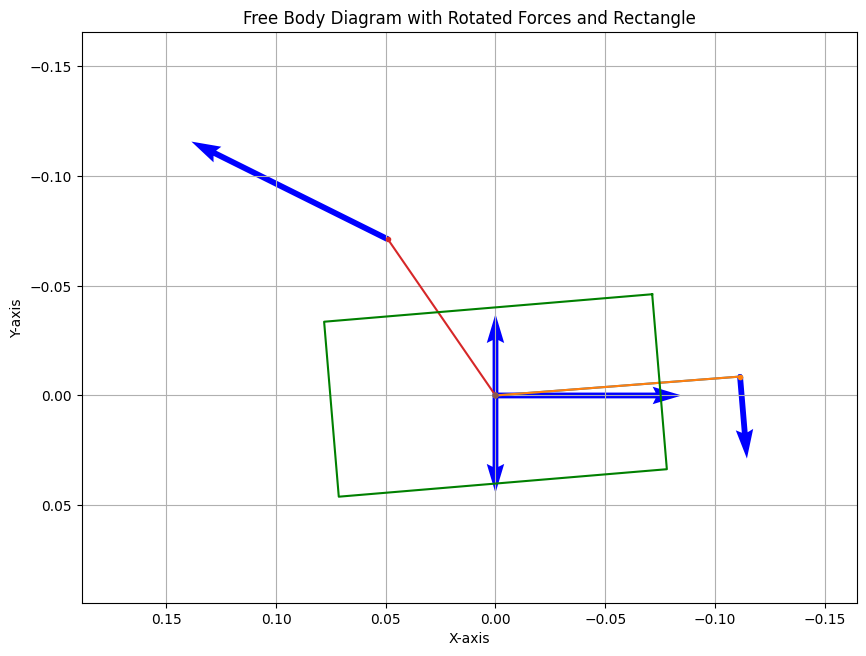

In [10]:
#Find equilibrium by minimizing Forces and moment individually using least squares
results_LS = sim.solve_equilibrium_state_LS(2)

initial_state = np.zeros(9)
initial_state[2] = results_LS[0]
initial_state[3] = 2

#plotfbd(sim, sim.eq_sim)

plot.plotfbd(sim, sim.eq_sim)

# Equilibrium Simulation

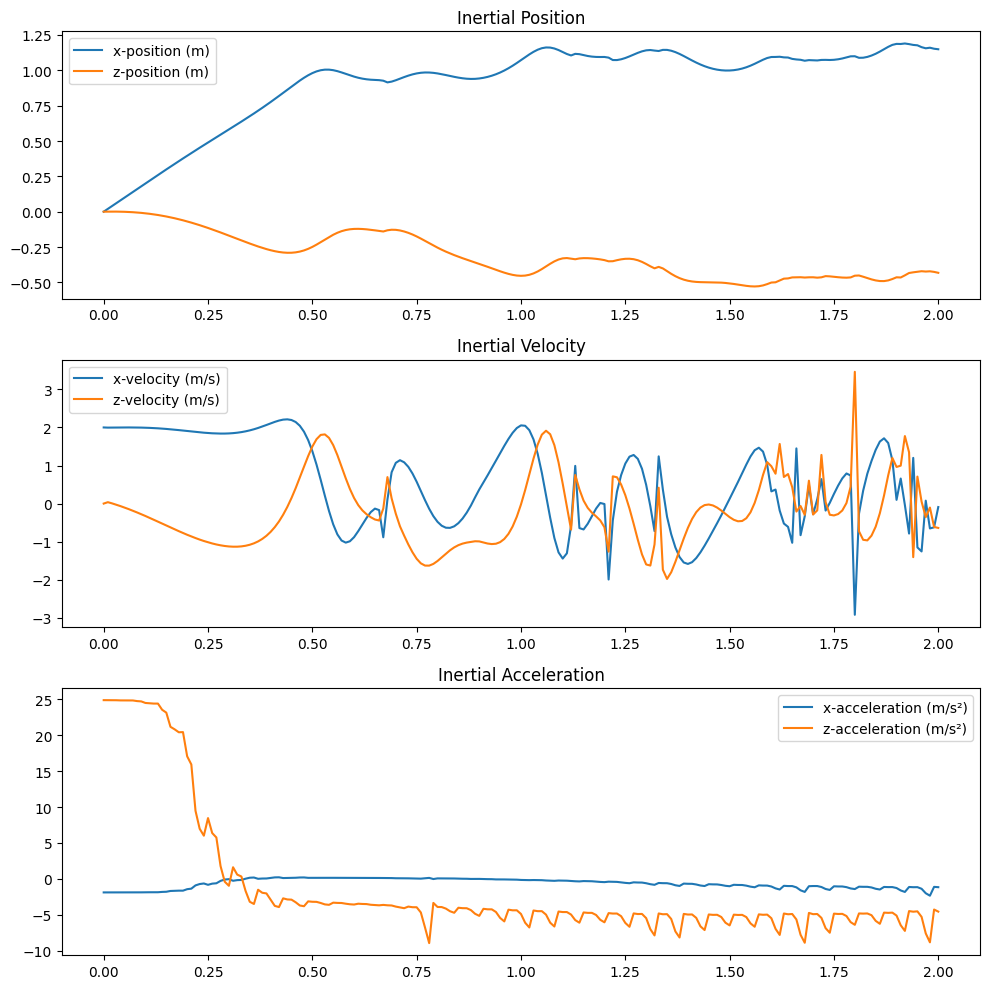

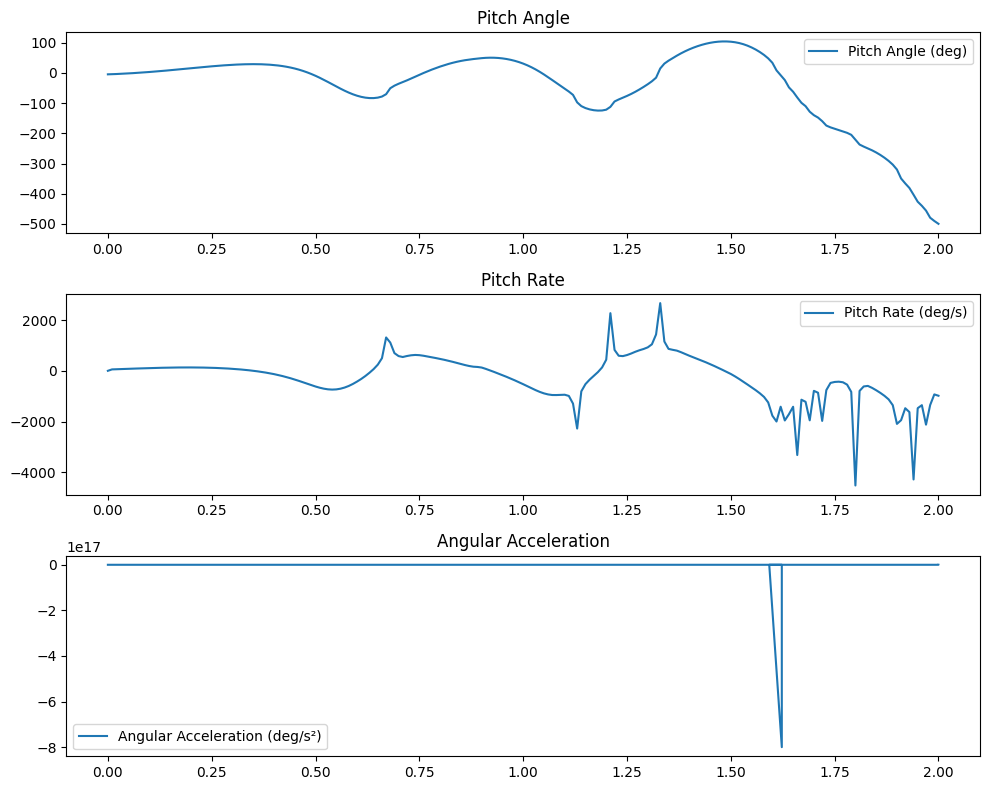

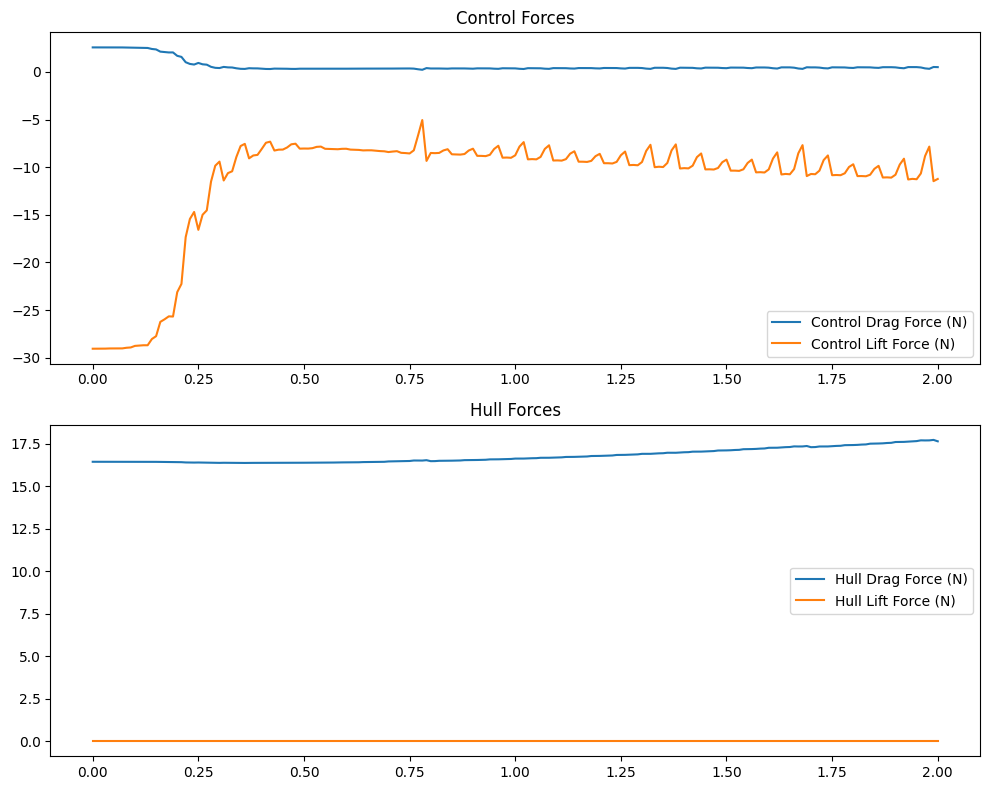

In [11]:
#print(initial_state)
sim_result_ivp, solution = sim.simulate_solve_ivp(200, 0.01, initial_state) ## RK45 Solver
plot.plot_simulation_results(sim_result_ivp)

# Perturbation Simulation

In [12]:
perturbed_state = np.copy(initial_state) 
perturbed_state[3] += 1 #Change Velocity

sim_result_ivp, solution = sim.simulate_solve_ivp(1000, 0.001, perturbed_state)
sim_result_ivp.plot_simulation_results()

AttributeError: 'Simulation_Result' object has no attribute 'plot_simulation_results'

# Jacobian & Eigenvalues

[  0.        +0.j           0.        +0.j
 411.8159351 +0.j          19.60300459+0.j
  -5.60974616+7.25773313j  -5.60974616-7.25773313j]


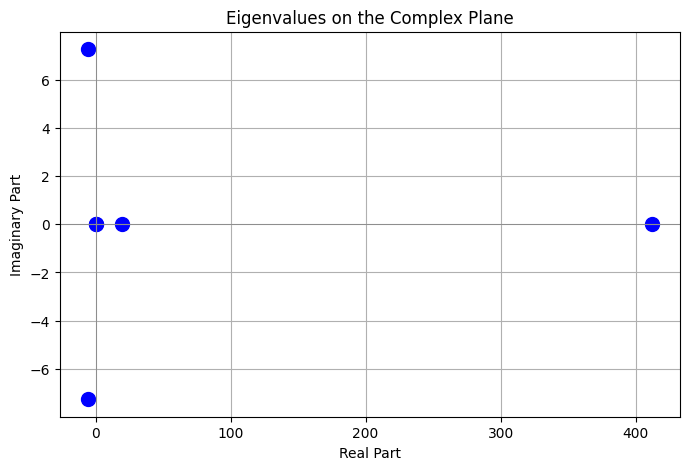

In [ ]:
velocity = 2
pitch_angle = results_LS[0]
jacobian = sim.calculate_jacobian(velocity, pitch_angle, 1e-3)
eigs= np.linalg.eig(jacobian)
#print(jacobian)

# Sample list of complex eigenvalues
eigenvalues = eigs[0]
print(eigenvalues)

# Extract real and imaginary parts
real_parts = [z.real for z in eigenvalues]
imag_parts = [z.imag for z in eigenvalues]

# Plotting
plt.figure(figsize=(8,5))
plt.axhline(0, color='grey', lw=0.5)  # x-axis
plt.axvline(0, color='grey', lw=0.5)  # y-axis
plt.scatter(real_parts, imag_parts, color='blue', marker='o', s=100)

# Labels and title
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues on the Complex Plane")
plt.grid(True)
plt.show()

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------

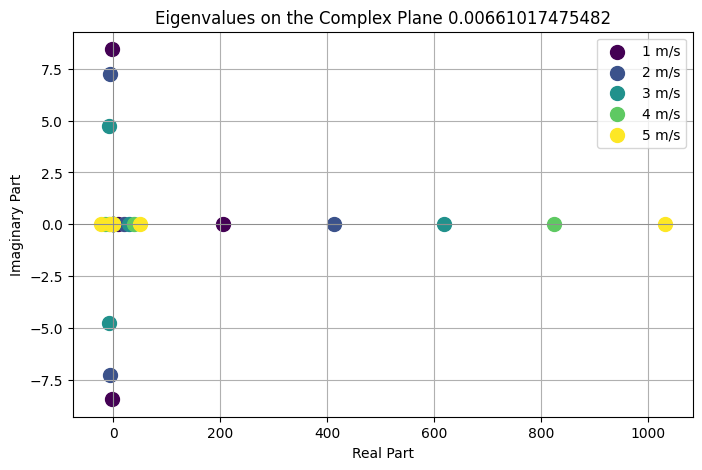

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------

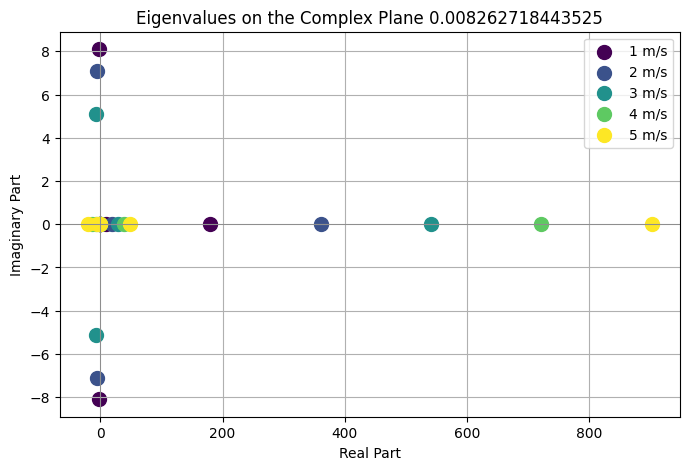

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------

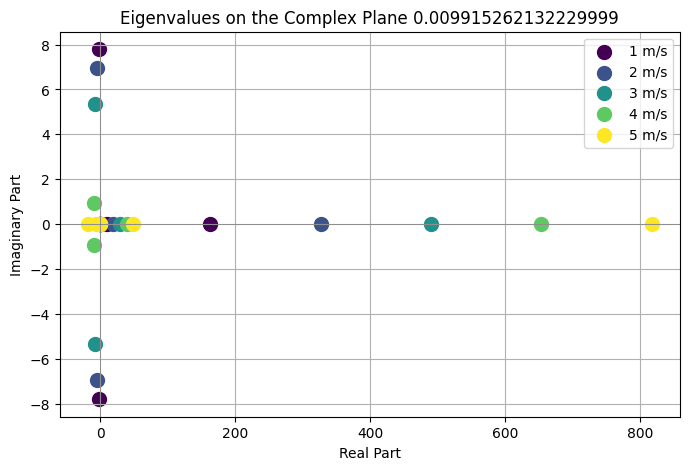

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------

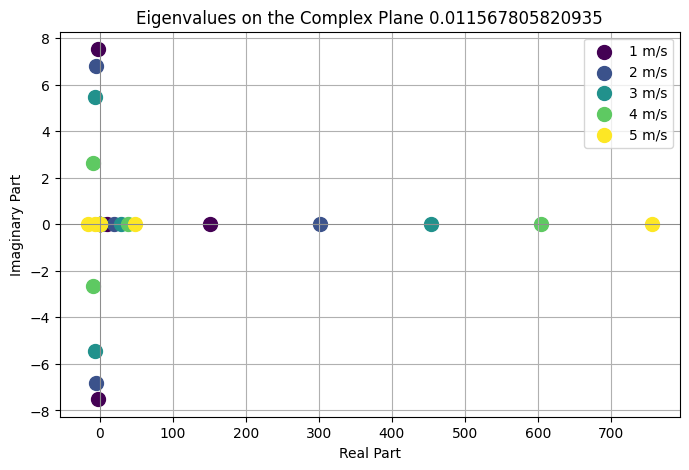

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -3.68           degrees   
Delta_t         27.05           degrees   
Towing Force    18.62           N         
Delta_i         3.94            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!
Optimization Results:
----------------

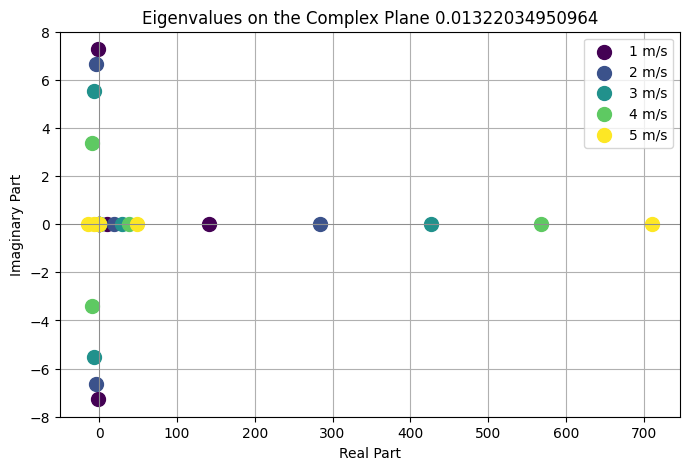

In [ ]:
Iyy = 6610.17475482 * 10 ** (-6) #kgm2
Var = np.linspace(Iyy, Iyy*2,5)

for j in [0,1,2,3,4]:
    sim.rigidbody.Iyy = Var[j]
    v = [1,2,3,4,5]
    eigenvalues = []
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0,1,len(v)))
    plt.figure(figsize=(8,5))
    for i in [0,1,2,3,4]:
        results_LS = sim.solve_equilibrium_state_LS(2)
        pitch_angle = results_LS[0]
        velocity = v[i]
        jacobian = sim.calculate_jacobian(velocity, pitch_angle, 1e-3)
        eigs= np.linalg.eig(jacobian)
        #print(jacobian)

        # Sample list of complex eigenvalues
        eigenvalues = eigs[0]

        # Extract real and imaginary parts
        real_parts = [z.real for z in eigenvalues]
        imag_parts = [z.imag for z in eigenvalues]

        # Plotting
        #
        
        plt.scatter(real_parts, imag_parts, color=colors[i] , marker='o', s=100, label=str(v[i])+" m/s")

    # Labels and title
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title("Eigenvalues on the Complex Plane " + str(Var[j]))
    plt.axhline(0, color='grey', lw=0.5)  # x-axis
    plt.axvline(0, color='grey', lw=0.5)  # y-axis
    plt.legend()
    plt.grid(True)
    plt.show()
